In [71]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Flatten


In [87]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [88]:
X_train.shape

(60000, 28, 28)

In [89]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [90]:
X_train.shape

(60000, 28, 28)

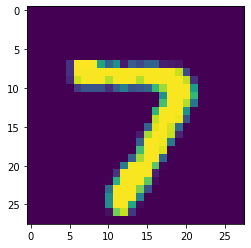

In [93]:
import matplotlib.pyplot as plt
plt.imshow(X_test[494])

In [94]:
X_train = X_train/255
X_test  = X_test/255

In [95]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [107]:
model = Sequential()

# Flatten 2D image matrix
model.add(Flatten(input_shape=(28,28)))

# Create hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [108]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [110]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 6s 119us/sample - loss: 0.2814 - accuracy: 0.9175 - val_loss: 0.1586 - val_accuracy: 0.9521
Epoch 2/15
48000/48000 [==============================] - 5s 106us/sample - loss: 0.1150 - accuracy: 0.9652 - val_loss: 0.1061 - val_accuracy: 0.9678
Epoch 3/15
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0797 - accuracy: 0.9756 - val_loss: 0.1059 - val_accuracy: 0.9703
Epoch 4/15
48000/48000 [==============================] - 5s 112us/sample - loss: 0.0612 - accuracy: 0.9811 - val_loss: 0.0938 - val_accuracy: 0.9722
Epoch 5/15
48000/48000 [==============================] - 5s 105us/sample - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.1080 - val_accuracy: 0.9703
Epoch 6/15
48000/48000 [==============================] - 5s 110us/sample - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.1028 - val_accuracy: 0.9717
Epoch 7/15
48000/48000 [==========================

In [111]:
Y_prob=model.predict(X_test)

In [112]:
Y_prob

array([[4.6653051e-13, 1.0135102e-13, 1.8991916e-08, ..., 9.9999869e-01,
        2.5734510e-12, 8.4611136e-09],
       [4.4265785e-19, 5.5324438e-09, 1.0000000e+00, ..., 1.0853898e-16,
        5.6680344e-11, 9.7149940e-22],
       [1.0514379e-10, 9.9993181e-01, 1.1815070e-07, ..., 2.2872395e-07,
        6.3202002e-05, 7.9317670e-11],
       ...,
       [2.3100551e-19, 6.9204198e-10, 5.0133043e-16, ..., 1.4095101e-10,
        9.7426678e-11, 1.2507188e-04],
       [2.5835472e-19, 8.6930724e-20, 1.2018100e-18, ..., 2.4148891e-14,
        8.6276784e-12, 8.3104799e-19],
       [2.4768548e-16, 3.1927092e-22, 1.6057588e-19, ..., 1.7518217e-25,
        1.3017196e-17, 2.4716963e-20]], dtype=float32)

In [113]:
y_pred=Y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9714

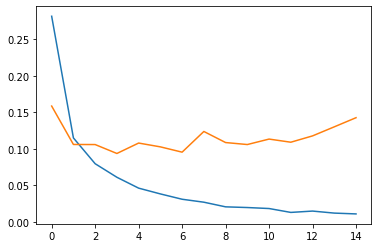

In [115]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

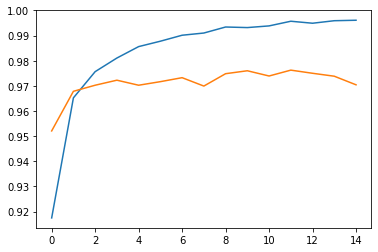

In [116]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

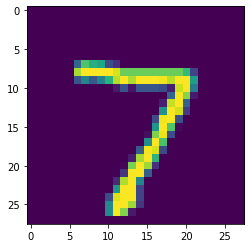

In [119]:
plt.imshow(X_test[0])

In [121]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

array([7], dtype=int64)